<a href="https://colab.research.google.com/github/giuliovv/tfest/blob/main/tfest_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tfest

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# import os
# os.chdir("..")
# import tfest

from scipy import signal

In [3]:
s1 = signal.lti([1], [1, 1])

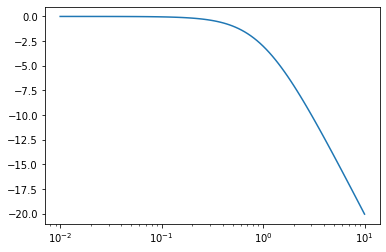

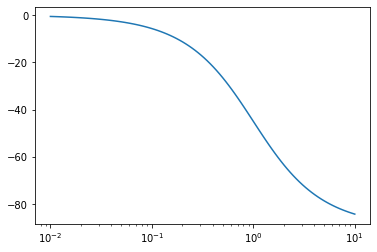

In [4]:
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

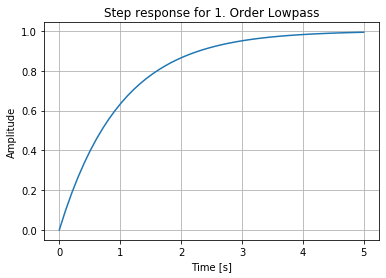

In [5]:
t = np.linspace(0, 5, num=50)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [6]:
te = tfest.tfest(u, y)

In [12]:
te.estimate(nzeros=0, npoles=1, method="fft", time=5)

Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 16
         Function evaluations: 31


 final_simplex: (array([[0.87236026, 1.09458076, 1.03700075],
       [0.87178069, 1.09920696, 1.02939386],
       [0.8798888 , 1.10323878, 1.02976877],
       [0.87008209, 1.09781914, 1.04240719]]), array([3.59789796e-06, 3.93896417e-06, 6.08252923e-06, 6.39751286e-06]))
           fun: 3.5978979558071675e-06
       message: 'Optimization terminated successfully.'
          nfev: 31
           nit: 16
        status: 0
       success: True
             x: array([0.87236026, 1.09458076, 1.03700075])

In [13]:
te.get_transfer_function()

TransferFunctionContinuous(
array([0.84123397]),
array([1.        , 1.05552552]),
dt: None
)

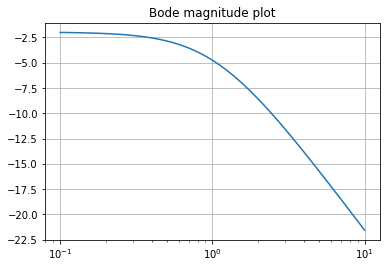

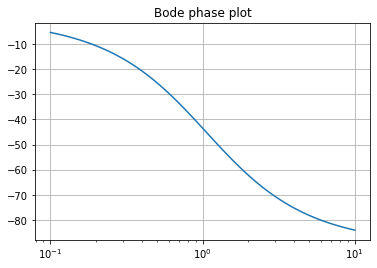

In [14]:
te.plot_bode()

/home/giulio/prog/.virtualenv/ML/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


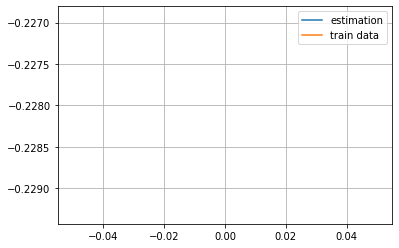

In [15]:
te.plot()